## Axelrod's Tournament

Axelrod's Tournament, proposed by political scientist Robert Axelrod in 1984, is a seminal study in evolutionary game theory. It investigates strategies for cooperation and the emergence of cooperation in repeated interactions, using the iterated prisoner's dilemma as the core game.

### Objective
The objective of Axelrod's Tournament is to explore which strategies are most effective in promoting cooperation and achieving high payoffs in repeated prisoner's dilemma interactions.

### Setup
- **Participants:** Various computer programs representing different strategies.
- **Game:** The iterated prisoner's dilemma, where two players repeatedly choose to cooperate or defect.
- **Scoring:** Participants' strategies are evaluated based on their cumulative payoff across multiple rounds of interactions.

### Key Findings
- **Tit-for-Tat:** The tournament demonstrated the effectiveness of the tit-for-tat strategy, which starts by cooperating and then mirrors the opponent's previous move.
- **Complex Strategies:** While simple strategies performed well, more sophisticated strategies that adapt to opponent behavior also achieved success.
- **Evolution of Cooperation:** Axelrod's Tournament showed that cooperation can emerge and persist in competitive environments through the adoption of reciprocal and forgiving strategies.

### Significance
- Axelrod's Tournament has had a profound impact on the study of cooperation, game theory, and evolutionary dynamics.
- Its findings have applications in biology, economics, political science, and computer science, informing research on cooperation and conflict resolution.

Axelrod's Tournament remains a landmark study, providing insights into the mechanisms underlying cooperation and the strategies that facilitate its emergence in competitive environments.


In [86]:
#%pip install axelrod

In [87]:
import axelrod as axl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [88]:
players = [
    axl.Cooperator(),                   # Always Cooperates
    axl.Defector(),                     # Always Defects
    axl.TitForTat(),                    # Cooperates on the first move, then mirros the opponent's last move
    axl.Grudger(),                      # Cooperates until the opponent defects, then always defects
    axl.Random(),                       # Randomly chooses to cooperate or defect
    axl.TitFor2Tats(),                  # Cooperates on the first move, then defects if the opponent defects twice in a row
    axl.ForgivingTitForTat(),           # Starts by cooperating but mirros the opponents moves if opponent has won more than 10% of the time
    axl.Retaliate(),                    # Starts by cooperating but deflects if opponent has won more than 10% of the games
    axl.FirstByJoss(),                  # Tit for Tat but defects 10% of the time regardless of opponent's last move
    axl.Prober(),                       # Plays D, C, C initially. Defects forever if opponent cooperated in moves 2 and 3. Otherwise plays TFT.
    axl.Aggravater(),                   # Grudger, except that it defects on the first 3 turns
]
#players = [s() for s in axl.strategies]

In [89]:
# Instantiate a Tournament object
tournament = axl.Tournament(players)
results = tournament.play()
eco = axl.Ecosystem(results)
eco.reproduce(1000)

Analysing: 100%|██████████| 25/25 [00:00<00:00, 109.83it/s]


C:\Users\Anshul Jawale\AppData\Local\Temp\ipykernel_11556\1518715392.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  stackplot.show()


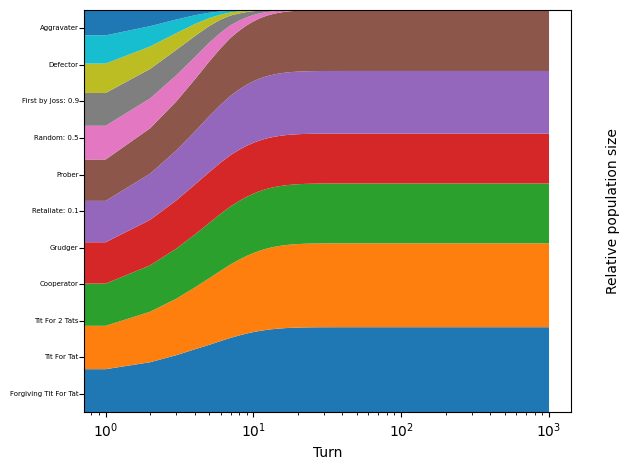

In [90]:
plot = axl.Plot(results)  
stackplot = plot.stackplot(eco)
stackplot.show()

C:\Users\Anshul Jawale\AppData\Local\Temp\ipykernel_11556\3179139329.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  boxplot.show()


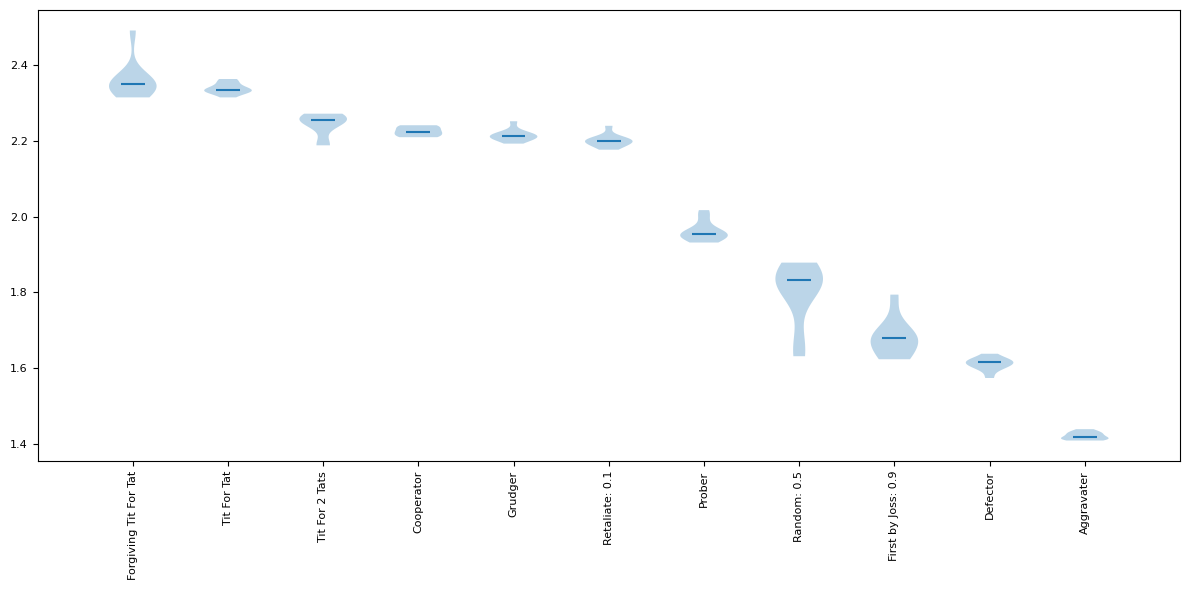

In [91]:
boxplot = plot.boxplot()
boxplot.show()

C:\Users\Anshul Jawale\AppData\Local\Temp\ipykernel_11556\3244706133.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  payoff_map.show()


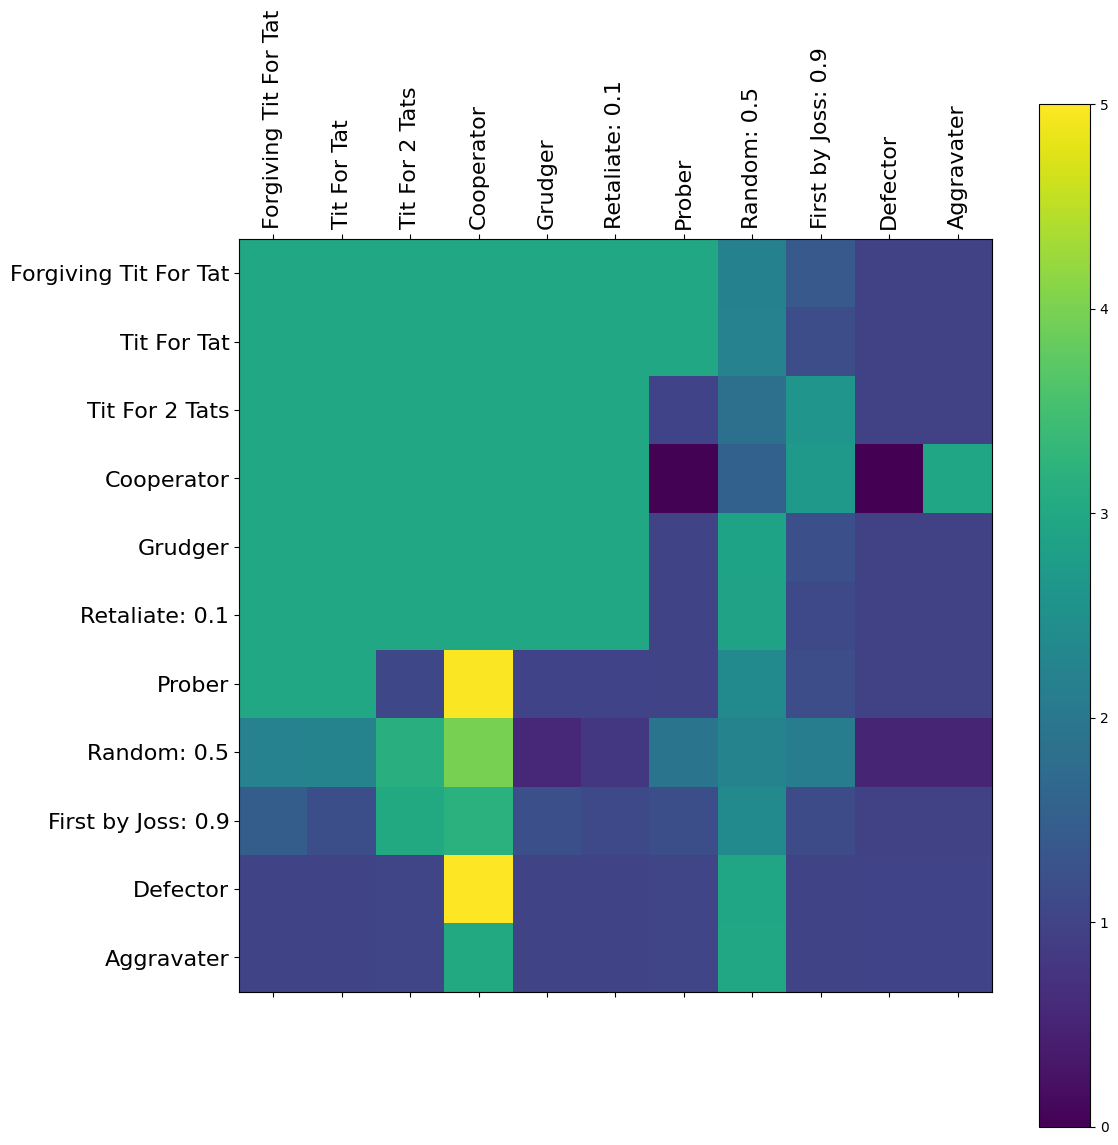

In [92]:
payoff_map = plot.payoff()
payoff_map.show()

In [93]:
summary = results.summarise()
df = pd.DataFrame([player.Name for player in summary], columns=['Player'], index=[player.Rank + 1 for player in summary])
df.columns.name = 'Rank'
#df['Wins'] = [player.Wins for player in summary]
df['Median Score'] = [player.Median_score for player in summary]
#df['Rank'] = [player.Rank + 1 for player in summary]
df['Cooperation Score'] = [player.Cooperation_rating for player in summary]
df['Cooperative'] = [player.Cooperation_rating >= 0.5 for player in summary]
df.head(len(results.ranked_names))

Rank,Player,Median Score,Cooperation Score,Cooperative
1,Forgiving Tit For Tat,2.34950,0.66865,True
2,Tit For Tat,2.33425,0.65705,True
3,Tit For 2 Tats,2.25400,0.67210,True
4,Cooperator,2.22375,1.00000,True
5,Grudger,2.21150,0.51270,True
6,Retaliate: 0.1,2.19925,0.51520,True
7,Prober,1.95350,0.25280,False
8,Random: 0.5,1.83150,0.49615,False
9,First by Joss: 0.9,1.67975,0.27050,False
10,Defector,1.61500,0.00000,False


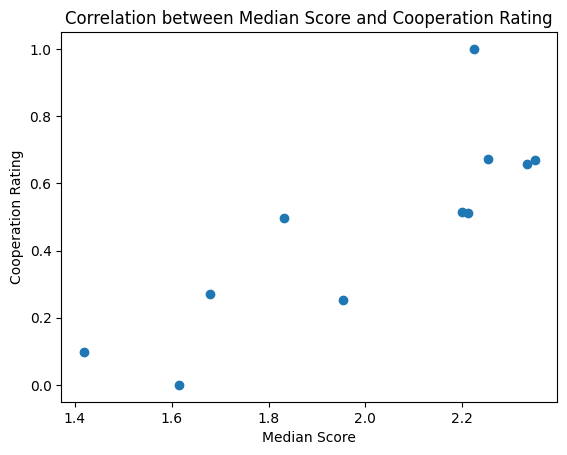

In [94]:
plt.scatter(df['Median Score'], df['Cooperation Score'])
plt.title('Correlation between Median Score and Cooperation Rating')
plt.xlabel('Median Score')
plt.ylabel('Cooperation Rating')
plt.show()